In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
sns.set_theme(color_codes=True)


In [3]:
tips = sns.load_dataset("tips")


# lmplot is figure-level
# regplot is axes-level

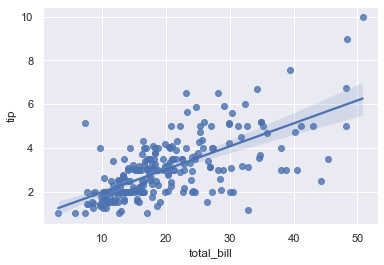

In [5]:
sns.regplot(x='total_bill', y='tip', data=tips);

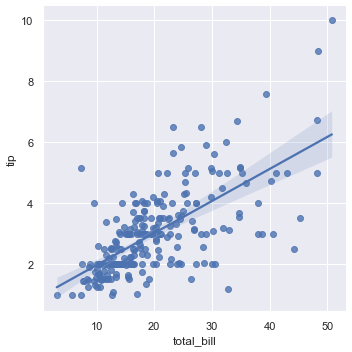

In [6]:
sns.lmplot(x="total_bill", y="tip", data=tips);

discrete value이지만 scatterplot에 적합하지 않은 경우가 있다.

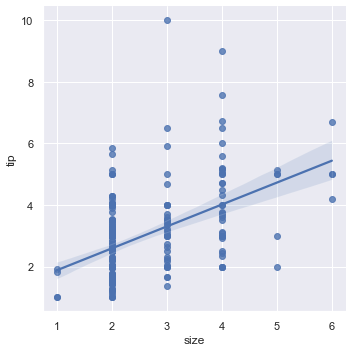

In [7]:
sns.lmplot(x="size", y="tip", data=tips);

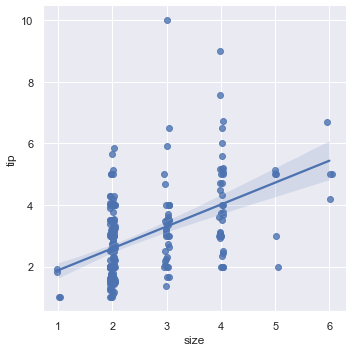

In [17]:
# 1. x_jitter
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.05);

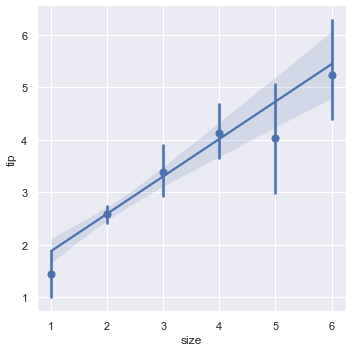

In [18]:
# 2. 신뢰구간과 함께 표현된 중심경향성으로 표현
# estimate of central tendency along with a confidence interval
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

In [21]:
anscombe = sns.load_dataset("anscombe")
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


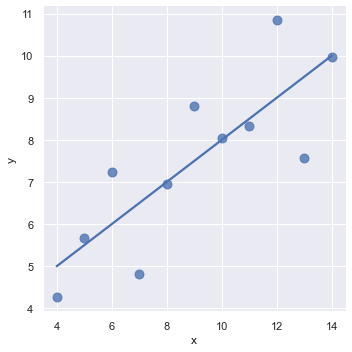

In [20]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80});

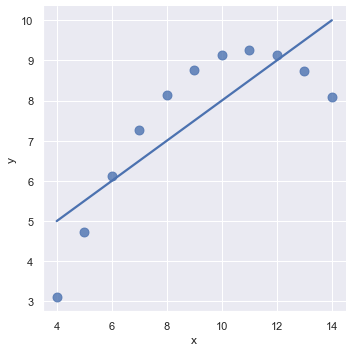

In [22]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80});

regression의 차수

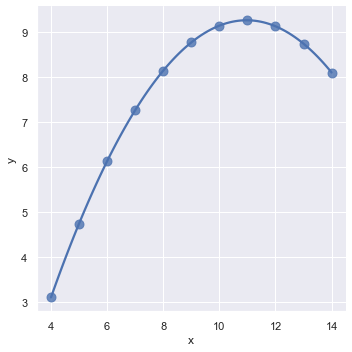

In [23]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80});

outlier에 robust하도록

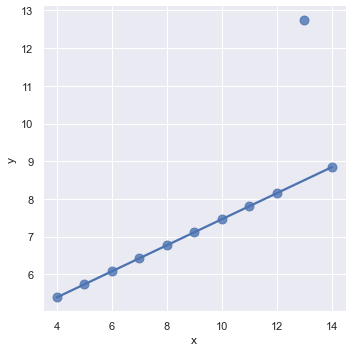

In [27]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80});

binary인 경우 fit이 안맞음

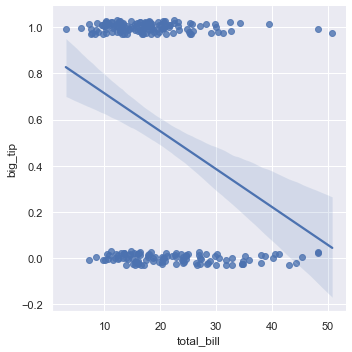

In [28]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03);

이럴 경우 logistic으로
- ci는 bootstrap procedure로 계산됨
- ci=None은 turn off

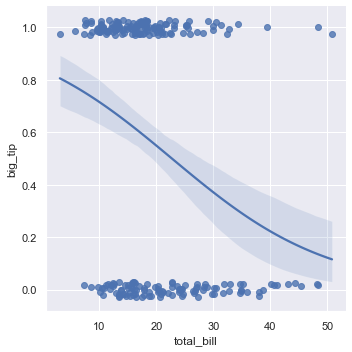

In [29]:
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03);

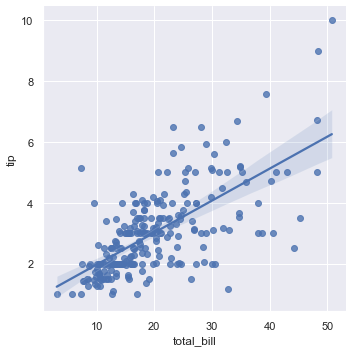

In [33]:
sns.lmplot(x="total_bill", y="tip", data=tips,
           lowess=False);

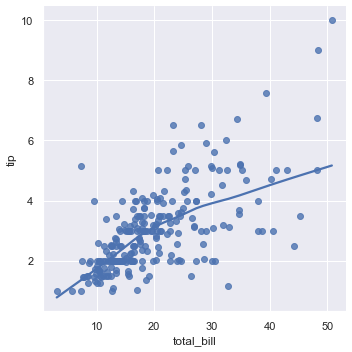

In [35]:
# An altogether different approach is to fit a nonparametric regression using a lowess smoother. 
# This approach has the fewest assumptions, although it is computationally intensive and so currently confidence intervals are not computed at all:
sns.lmplot(x="total_bill", y="tip", data=tips,
           lowess=True);

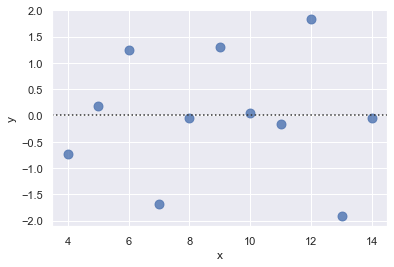

In [43]:
# sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
#               scatter_kws={"s": 80});
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80}, order=1);

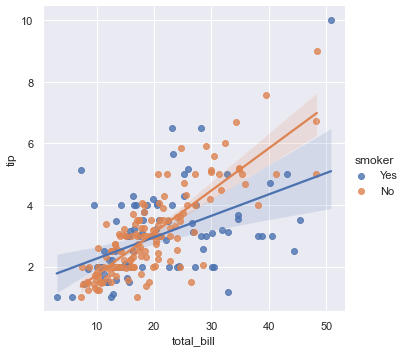

In [44]:
sns.lmplot(x='total_bill', y='tip', hue='smoker', data=tips);

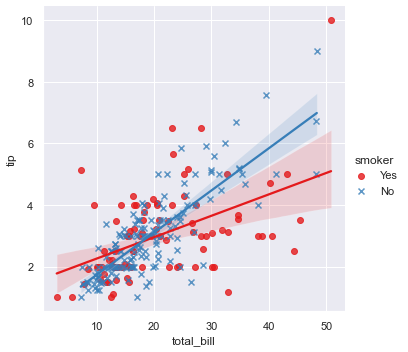

In [45]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1");

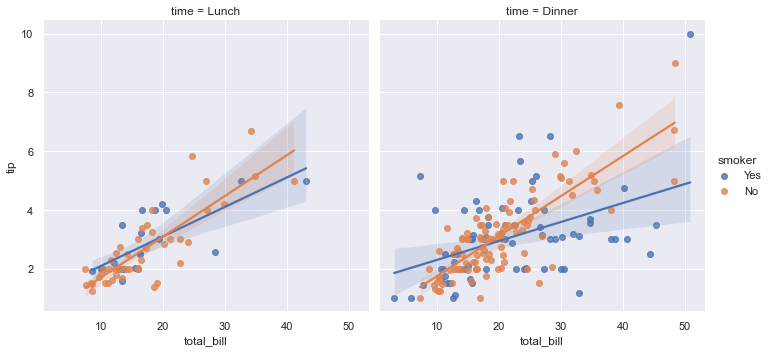

In [46]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

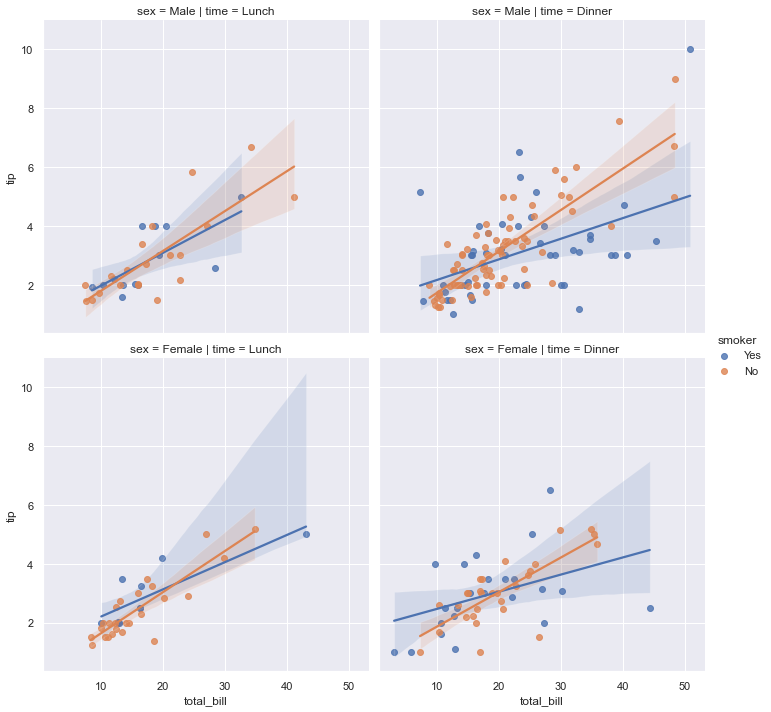

In [47]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips);

figure size 조절

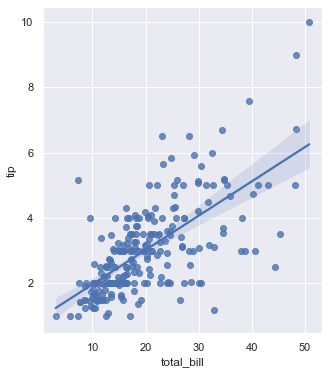

In [48]:
f, ax = plt.subplots(figsize=(5, 6))
sns.regplot(x="total_bill", y="tip", data=tips, ax=ax);

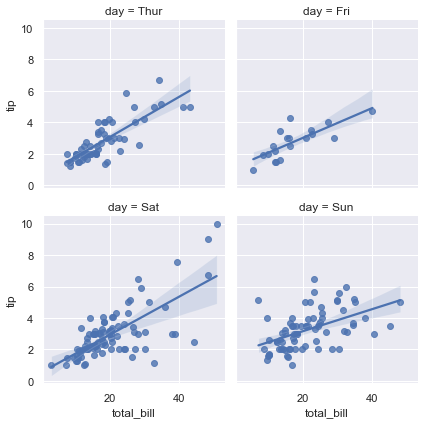

In [49]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           col_wrap=2, height=3);

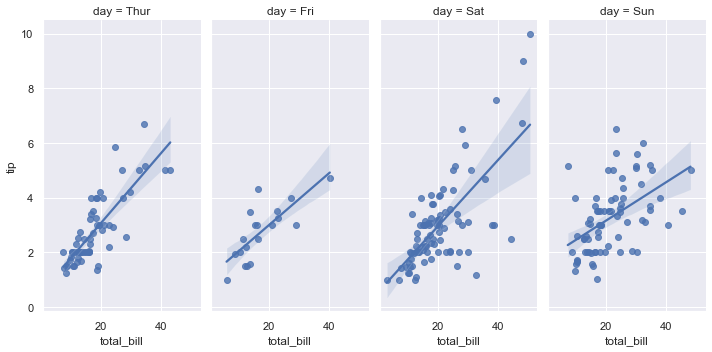

In [50]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           aspect=.5);

# Plotting a regression in other contexts

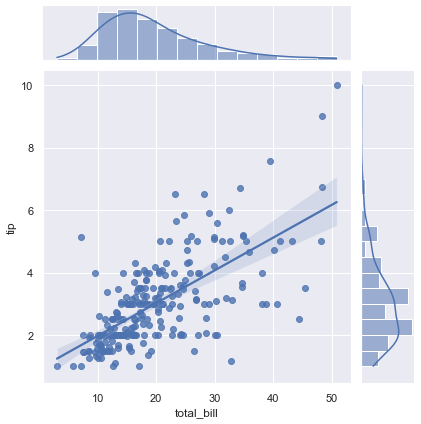

In [51]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg");

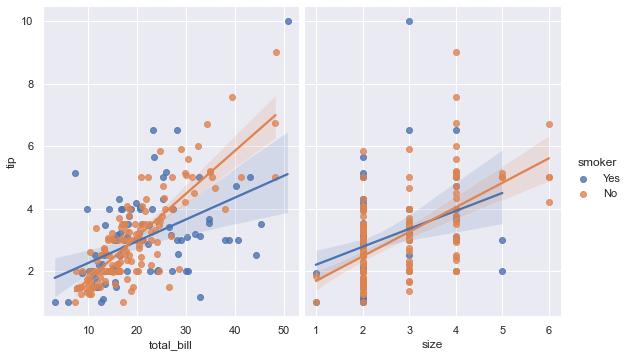

In [55]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             hue="smoker", height=5, aspect=.8, kind="reg");